# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, cauchy

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

def coin(size):
    return sps.bernoulli.rvs(p=0.5, size=size)

def uniform(size=(1,), precision=30):
    if isinstance(size, tuple):
        binary = coin(np.prod(size) * precision).reshape(*size, precision)
    else:
        binary = coin(size * precision).reshape(size, precision)
    powers = np.power(0.5, np.arange(1, precision + 1))
    return binary.dot(powers)

def normal(size=1, loc=0, scale=1, precision=30):
    u1, u2 = uniform(size, precision), uniform(size, precision)
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    return loc + scale * r * np.cos(theta)

def exponential(size=1, lambd=1, precision=30):
    u = uniform(size, precision)
    return -np.log(1 - u) / lambd

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

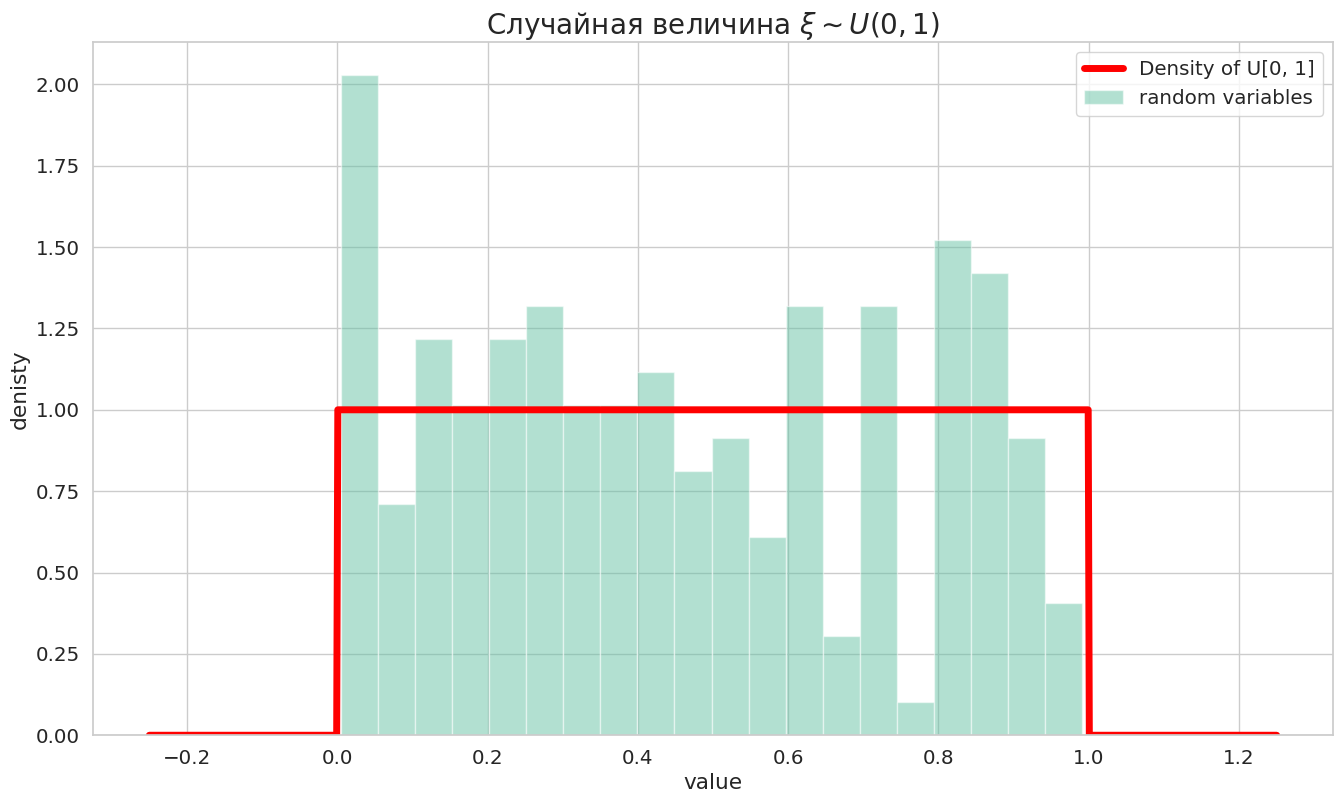

In [4]:
random_vars = uniform(size=200)
x = np.linspace(-0.25, 1.25, 1000)
y = np.where((x >= 0) & (x <= 1), 1, 0)
plt.figure(figsize=(16, 9))
plt.plot(x, y, label='Density of U[0, 1]', lw = 5, color="red")
plt.hist(random_vars, density=True, bins=20, alpha=0.5, label='random variables')
plt.xlabel("value")
plt.ylabel("denisty")
plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=20)
plt.legend()
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

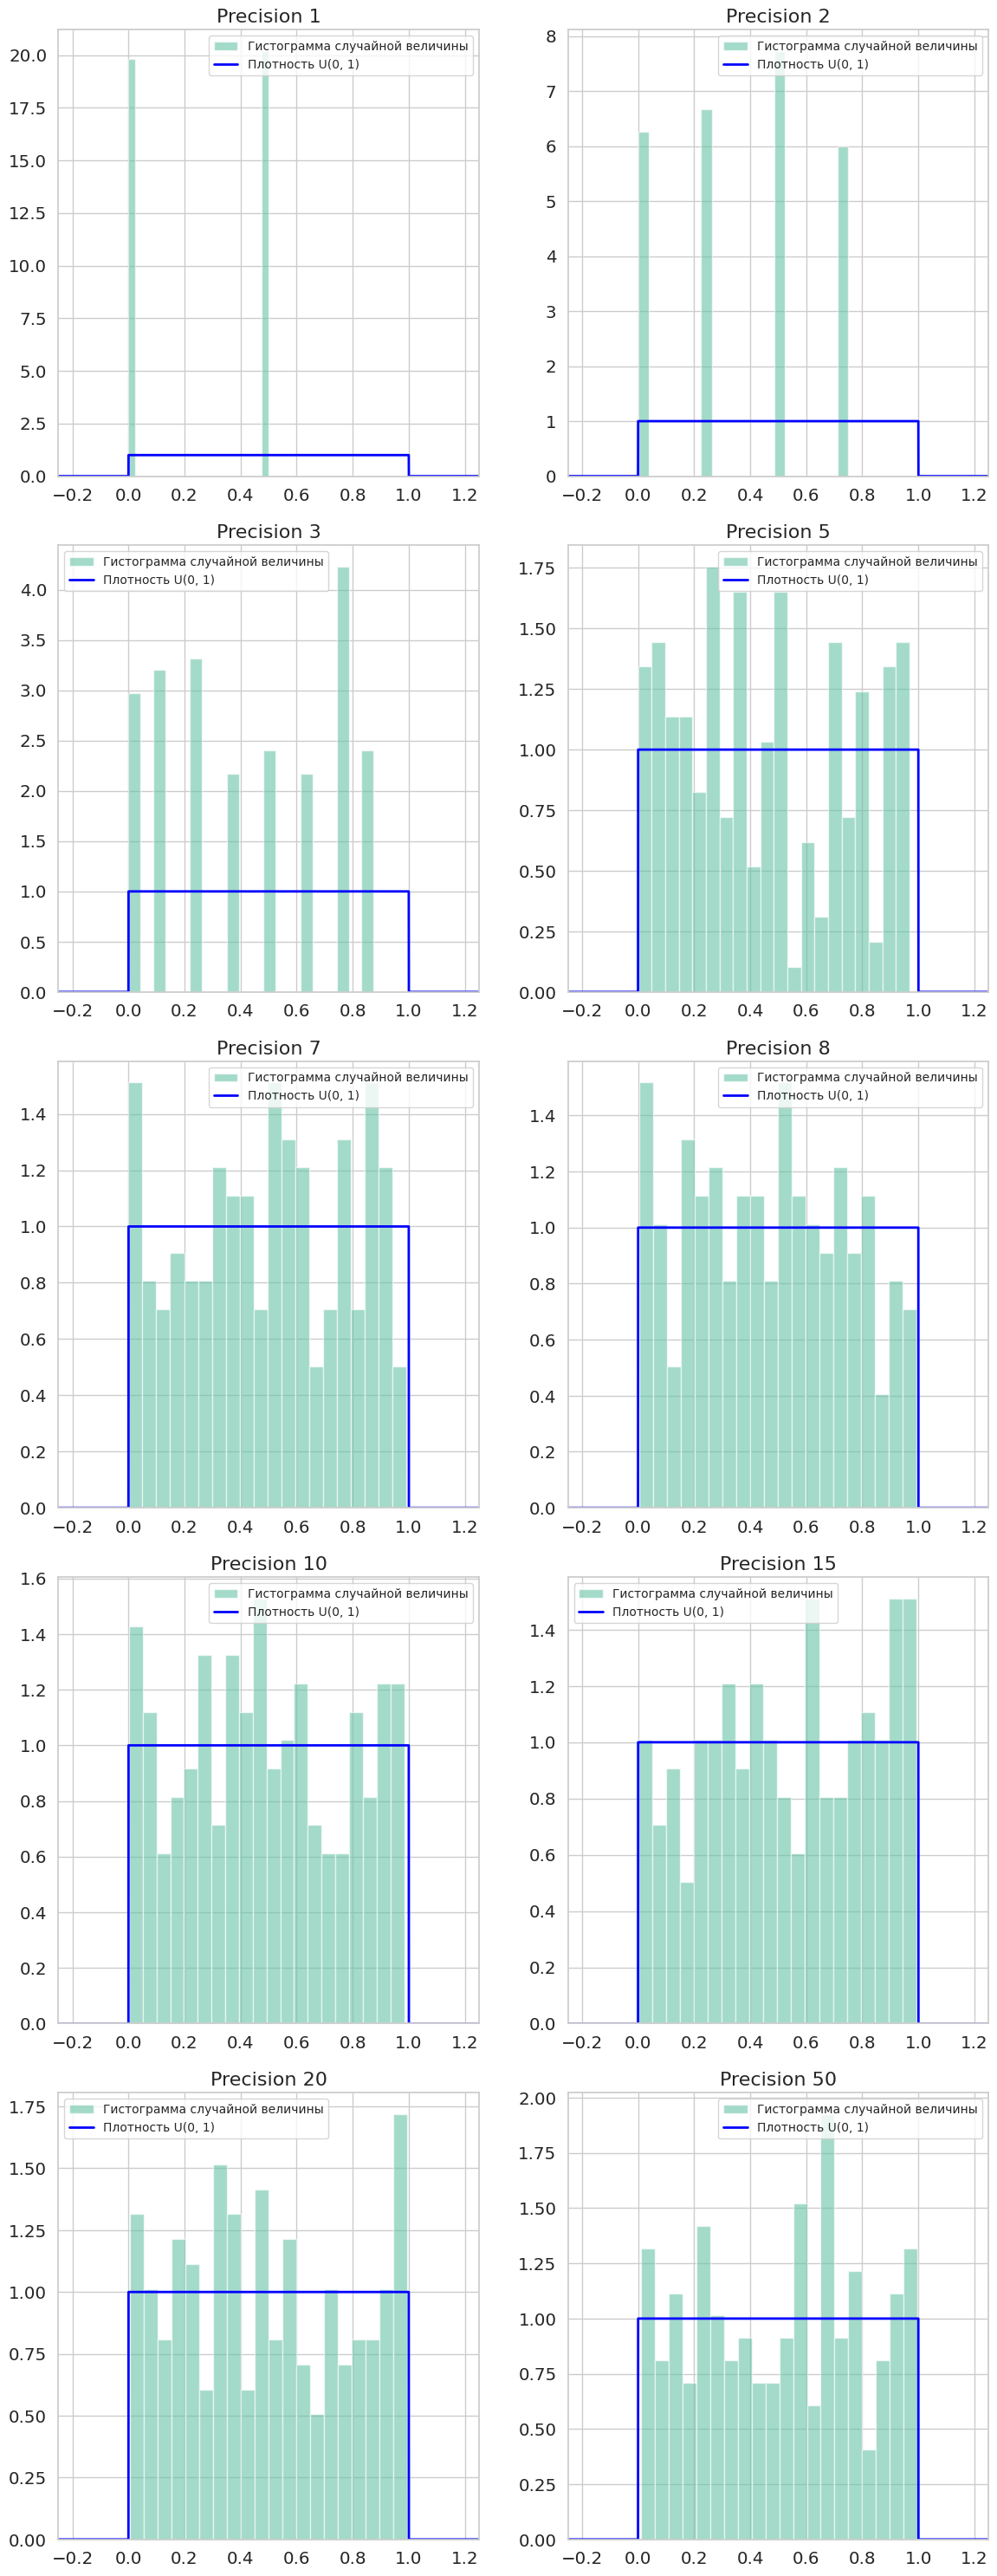

In [5]:
grid = np.linspace(-0.5, 1.5, 10001)
precisions = [1, 2, 3, 5, 7, 8, 10, 15, 20, 50]

plt.figure(figsize=(12, 30))
for i, prec in enumerate(precisions, 1):
    sample = uniform(200, prec)
    plt.subplot(5, 2, i)
    plt.hist(sample, bins=20, density=True, alpha=0.6, label='Гистограмма случайной величины')
    plt.plot(grid, sps.uniform(loc=0, scale=1).pdf(grid), color='blue', lw=2, label='Плотность U(0, 1)')
    plt.title(f'Precision {prec}', fontsize=16)
    plt.xlim(-0.25, 1.25)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

Видно как при увеличении точности распределение все больше похоже на равномернораспределенное, сначала очень сильной отклонение, но затем происходит выравнивание распределения.

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

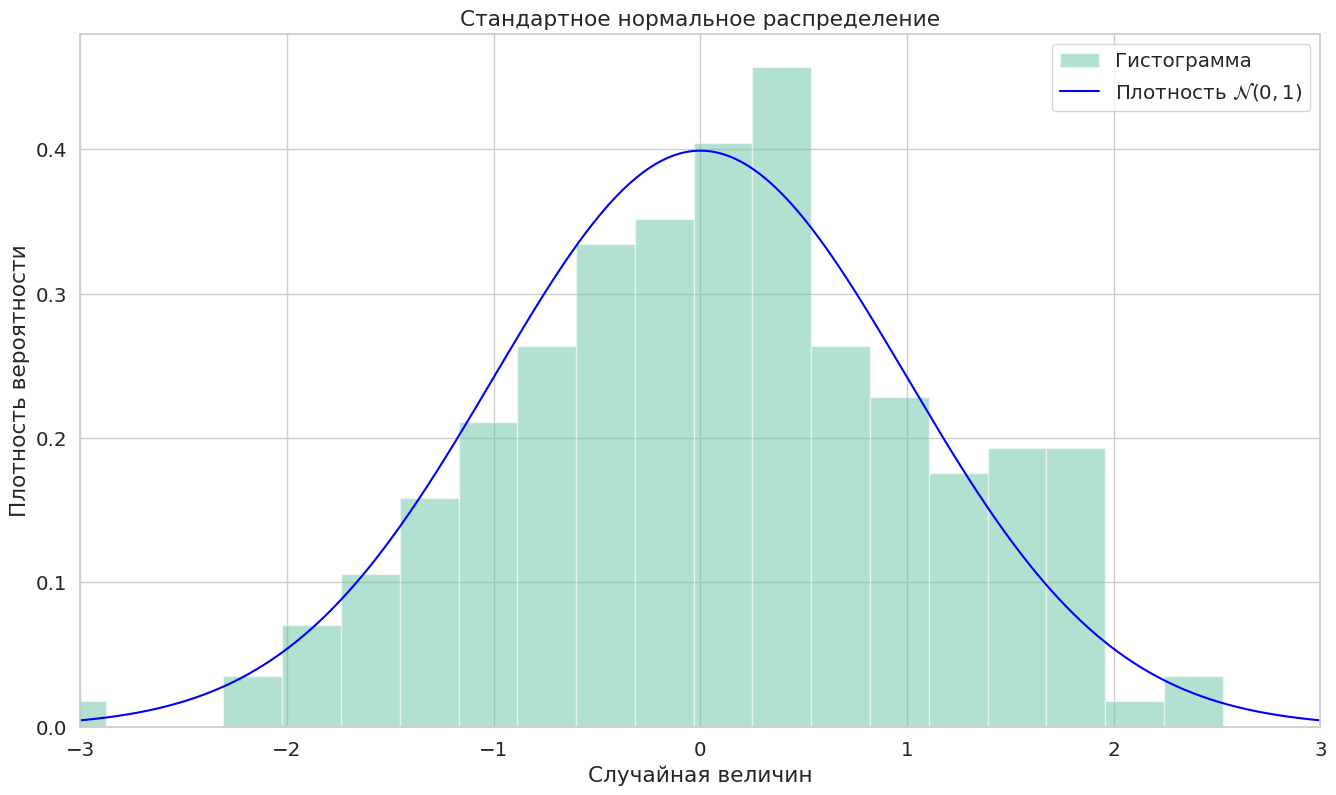

In [6]:
random_vars = normal(size=200)
grid = np.linspace(-3, 3, 1000)

plt.figure(figsize=(16, 9))
plt.hist(random_vars, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.title('Стандартное нормальное распределение')
plt.xlabel('Случайная величин')
plt.ylabel('Плотность вероятности')
plt.legend()


plt.plot(grid, sps.norm.pdf(grid), color='blue', label='Плотность $\mathcal{N}(0, 1)$')
plt.xlim(-3, 3)
plt.legend()

plt.grid(True)
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

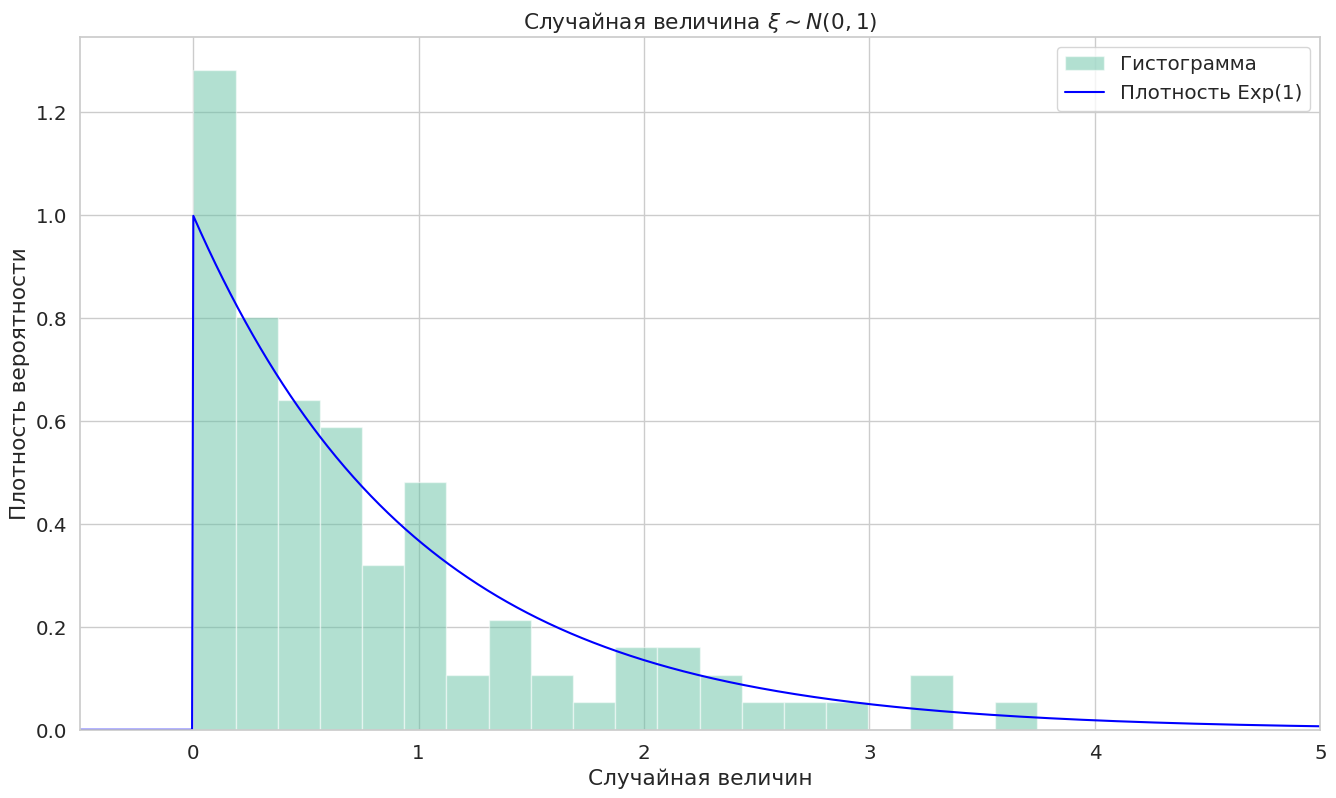

In [7]:
random_vars = exponential(size=100)
grid = np.linspace(-0.5, 5, 1000)

plt.figure(figsize=(16, 9))
plt.hist(random_vars, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.title(r'Случайная величина $\xi\sim N(0, 1)$')
plt.xlabel('Случайная величин')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.plot(grid, sps.expon.pdf(grid), color='blue', label='Плотность Exp(1)')
plt.xlim(-0.5, 5)
plt.legend()

plt.grid(True)
plt.show()

**Выводы:**

1) Равномерное распределение приближается при увеличении точности, это неудивительно, ведь его генерация становится более независимой.
2) Функции которые я написал для равномерного, нормального и экспоненцального распределения при помощи монетки достаточно хорошо приближаются к реальному распределению, при росте числа получения значений в этом можно убедиться, ведь даже на маленьких выборках гистограммы повторяют распределения.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

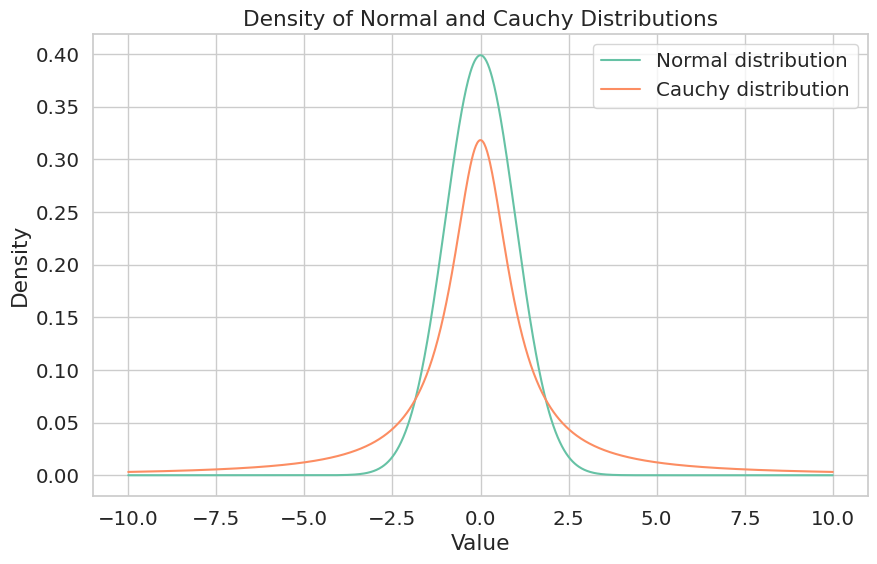

In [8]:
plt.figure(figsize=(10, 6))
x = np.linspace(-10, 10, 1000)
plt.plot(x, norm.pdf(x), label='Normal distribution')
plt.plot(x, cauchy.pdf(x), label='Cauchy distribution')
plt.legend(loc='upper right')
plt.title("Density of Normal and Cauchy Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)

Исходя из графика можно заметить что распределение Коши повторяет форму нормального распределения, единственное значения Коши убывают медленне, чем значения нормальной случайной величины, что также видно из графика. Аналогично растут они тоже более плавно(медленнее), чем в нормальном распределении.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [9]:
size = 1000
samples = sps.cauchy().rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

(0.0, 1000.0)

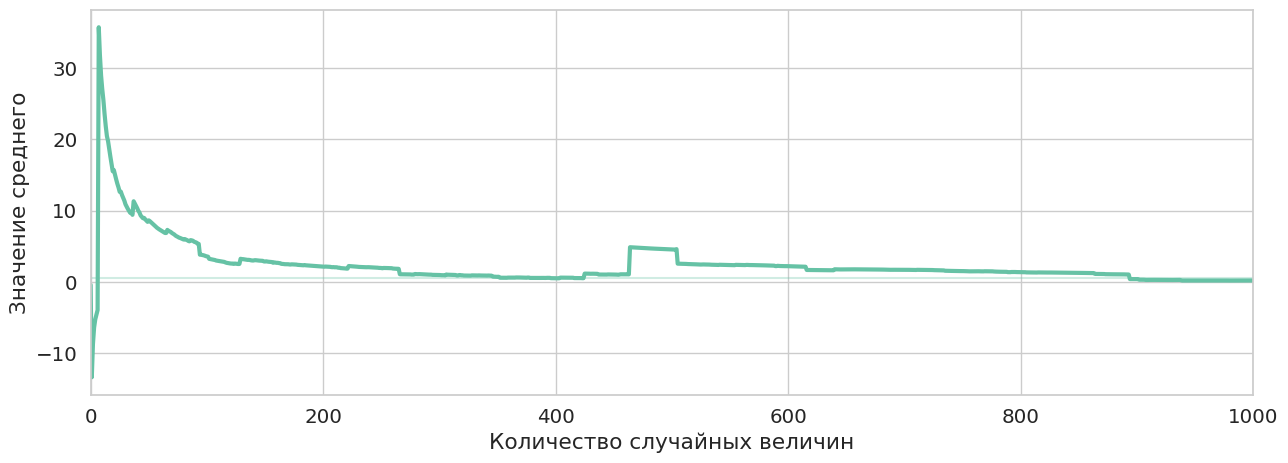

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))

Видно, что значение среднего не сходится, чтобы проверить гипотезу сделаем то же самое еще несколько раз(500).

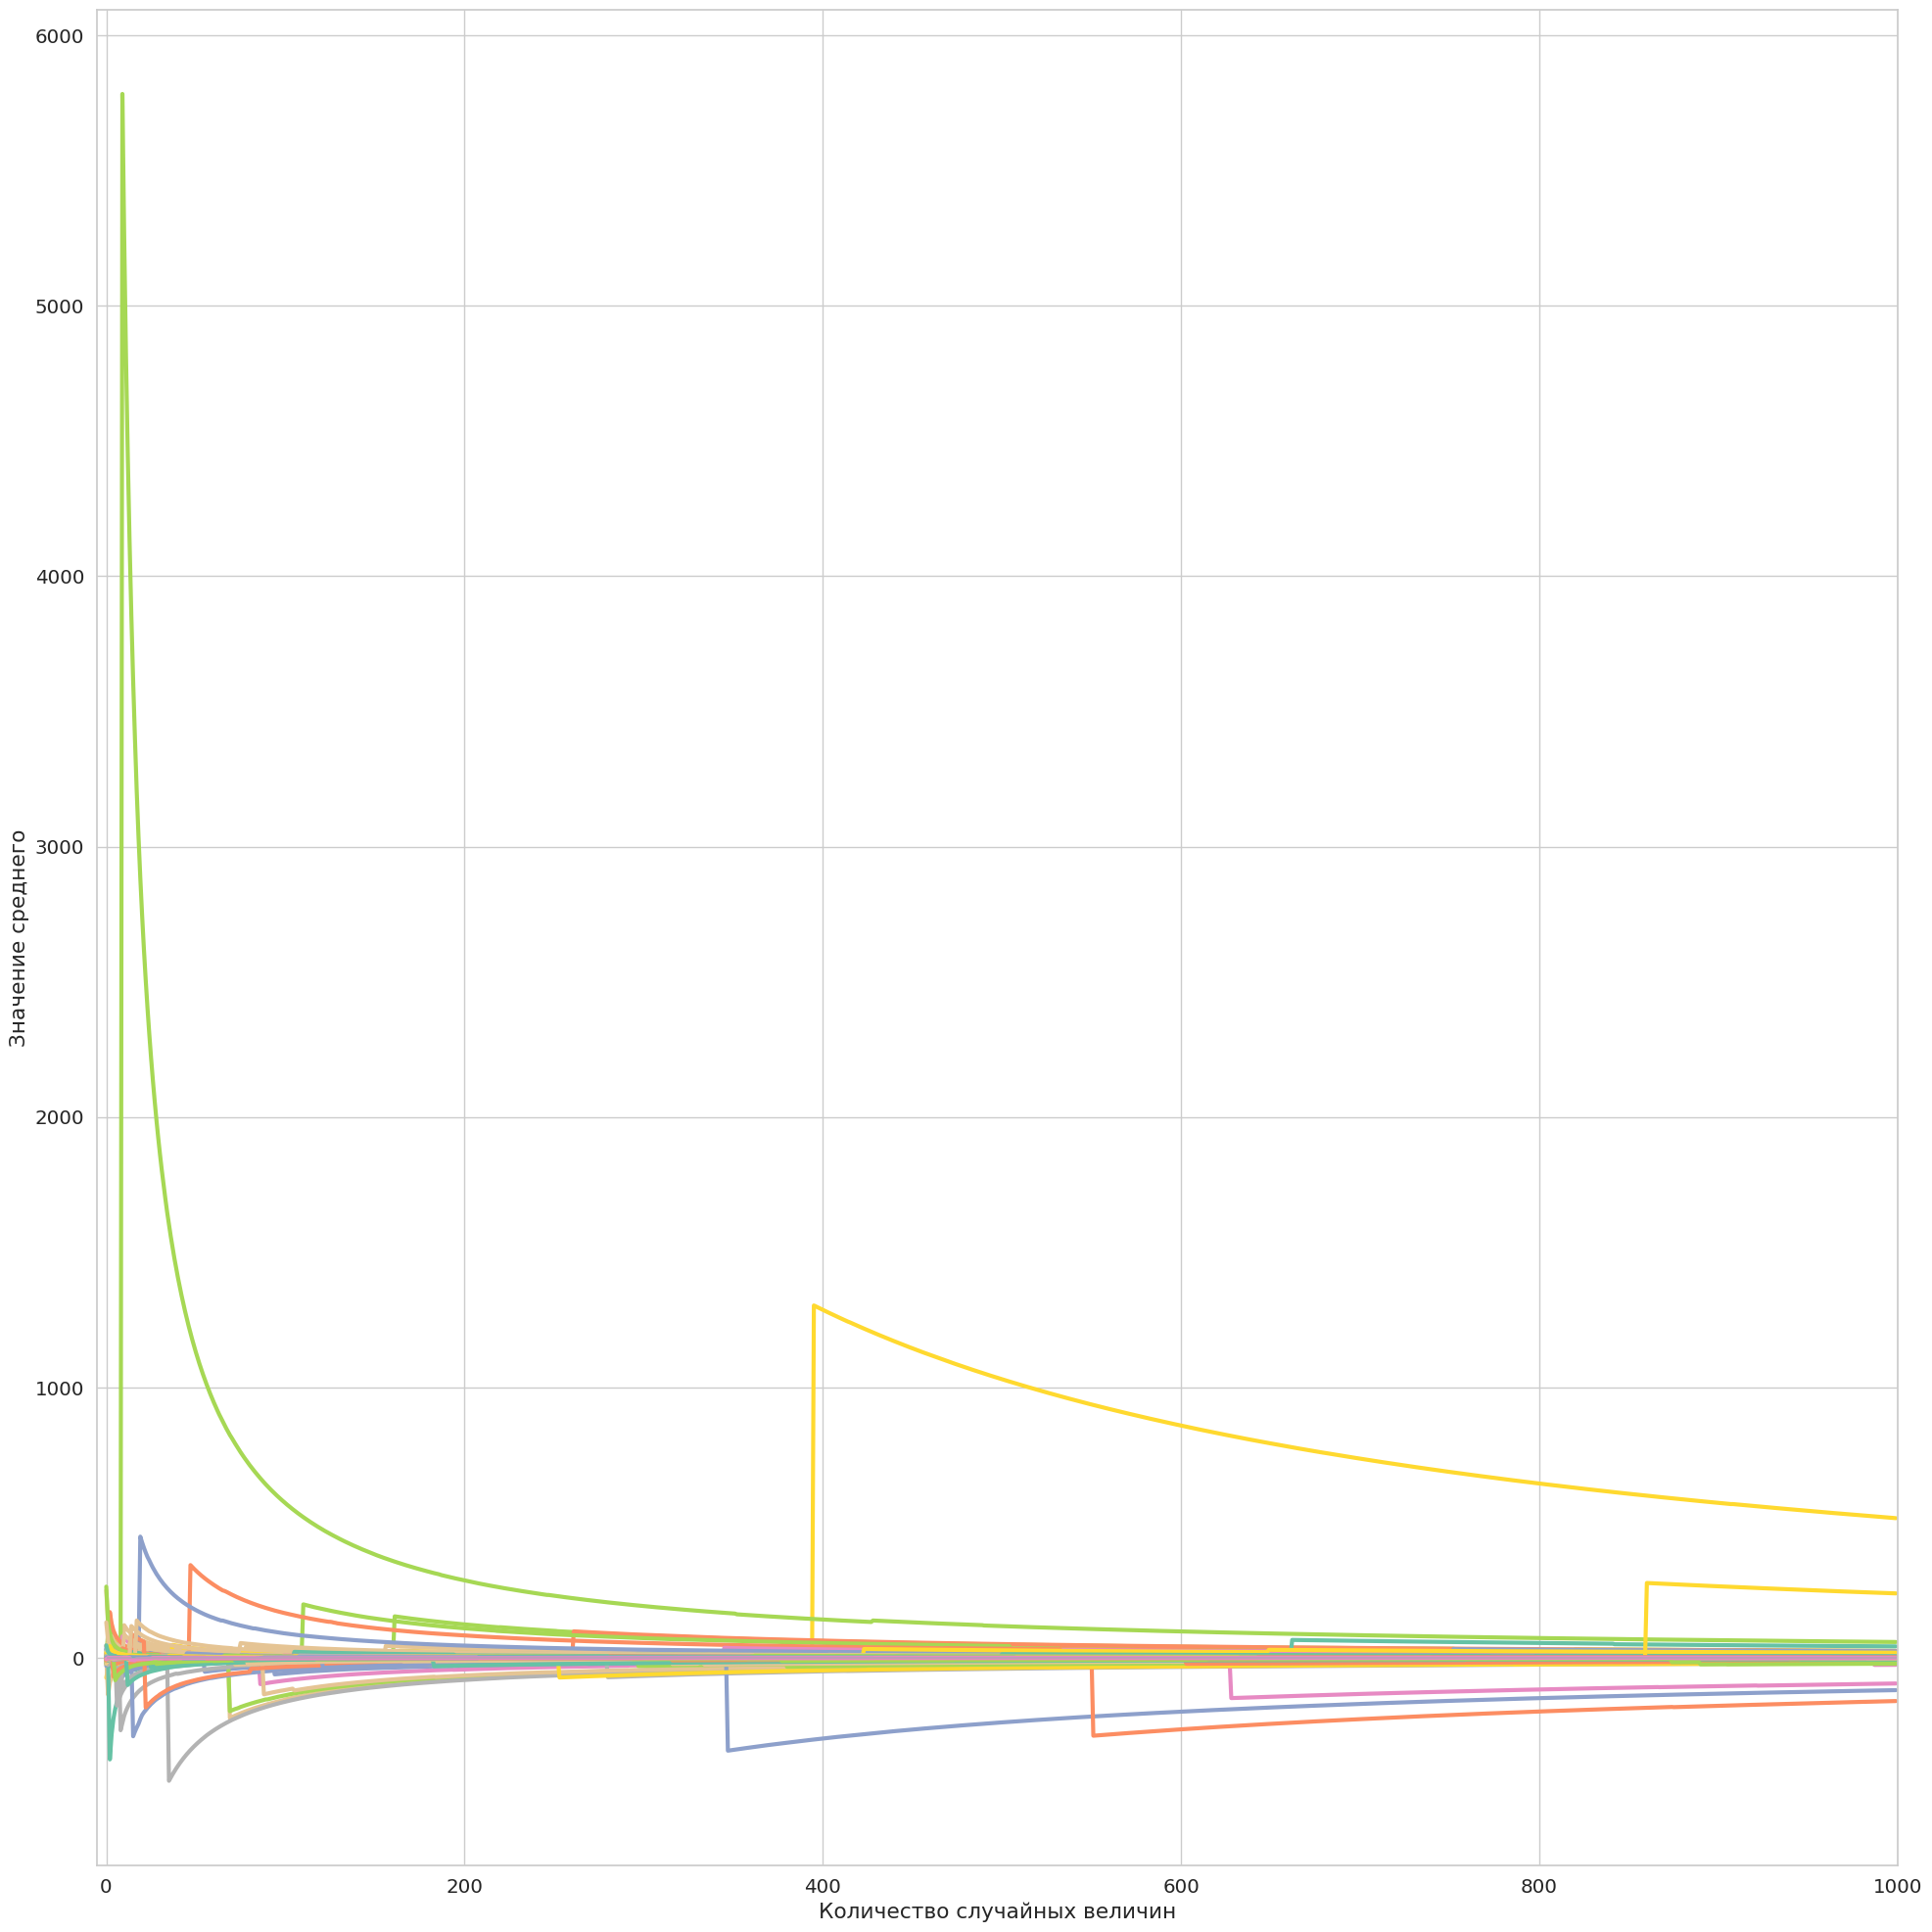

In [11]:
plt.figure(figsize=(20, 20))
for i in range(500):
    samples = sps.cauchy().rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((-5, size))
plt.tight_layout()

Как можно увидеть из графиков значение среднего действительно не сходится

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [12]:
size = 1000 
samples_count = 500

samples = sps.cauchy().rvs(size=(samples_count, size))

prefix_medians = [[np.median(samples[i, :j+1]) for j in range(size)] for i in range(samples_count)]

(0.0, 1000.0)

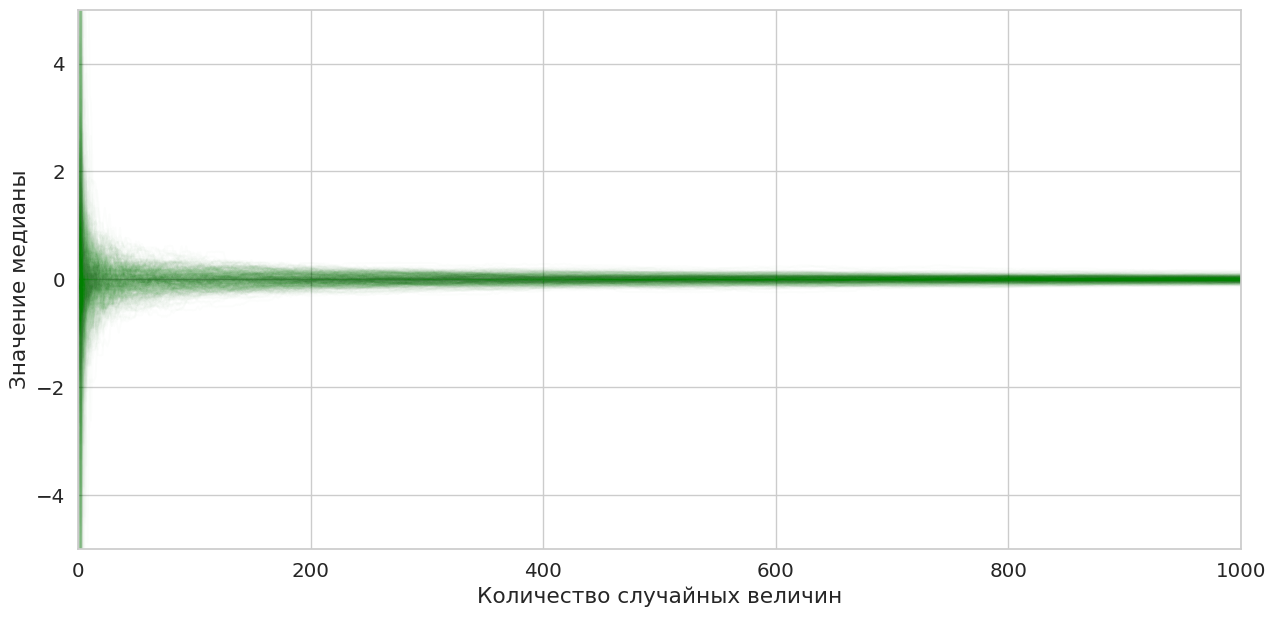

In [13]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, prefix_medians[i], color="green", alpha=0.01)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение медианы")
plt.ylim(-5, 5)
plt.xlim((0, size))

**Вывод:**

В результате исследования для распределения Коши установлено, что ЗБЧ не выполняется. Такое происходит потому что у распределения Коши нет математического ожидания, а значит условия ЗБЧ не выполняются. Но при этом по графику видно, что если поменять среднее на медиану распределения, то будет сходиться.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).


Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [14]:
a = 0.5
K = 500
tolerance = 0.02
max_n = 1000
samples = np.random.binomial(1, a, (max_n, K))

cum_sums = np.cumsum(samples, axis=0)
n_values = np.arange(1, max_n + 1).reshape(-1, 1)
sample_means = cum_sums / n_values

F_values = np.mean(np.abs(sample_means - a), axis=1)

min_ans = np.min(np.where(F_values <= tolerance)[0][0]) + 1
print(f'Минимальное n: {min_ans}')

Минимальное n: 429


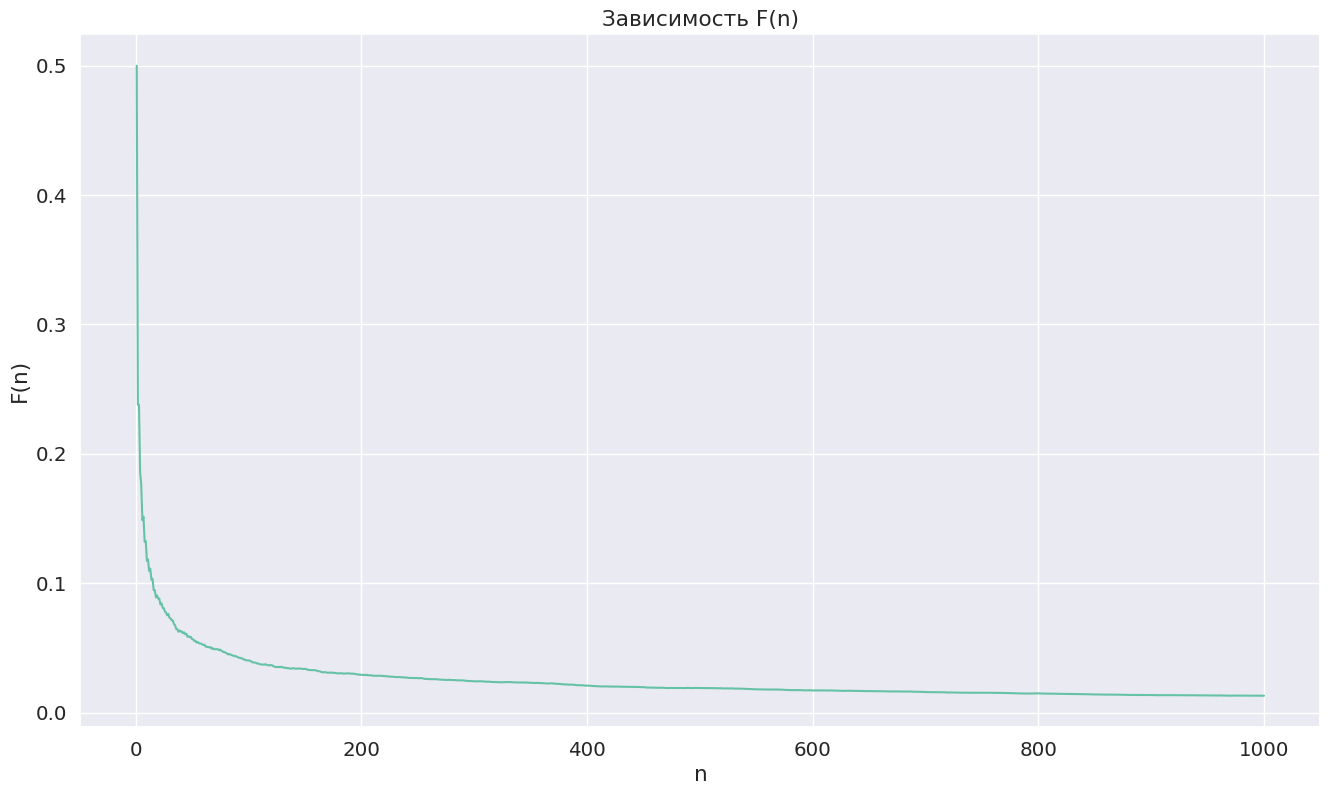

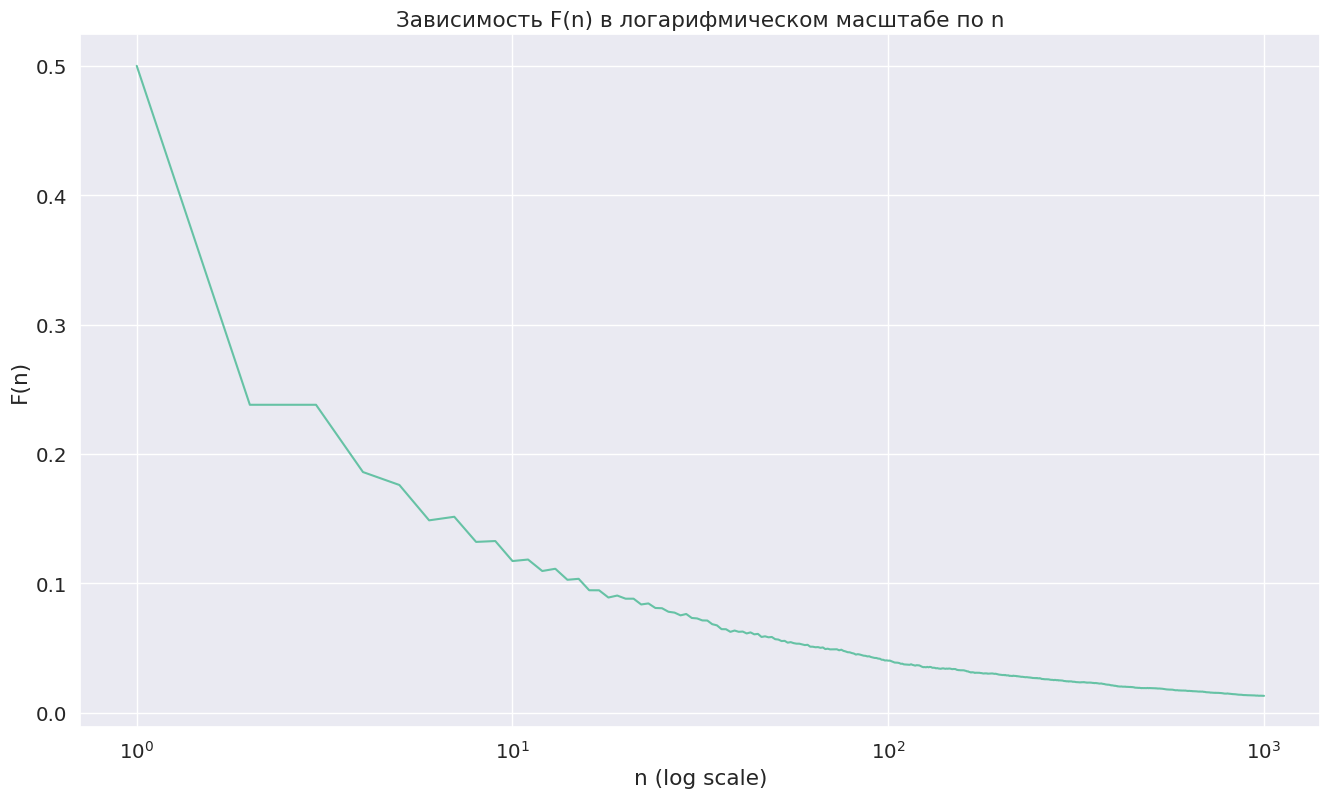

In [15]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16, 9))
    plt.plot(np.arange(1, max_n + 1), F_values)
    plt.xlabel('n')
    plt.ylabel('F(n)')
    plt.title('Зависимость F(n)')
    plt.show()

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(16, 9))
    plt.plot(np.arange(1, max_n + 1), F_values)
    plt.xscale('log')
    plt.xlabel('n (log scale)')
    plt.ylabel('F(n)')
    plt.title('Зависимость F(n) в логарифмическом масштабе по n')
    plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

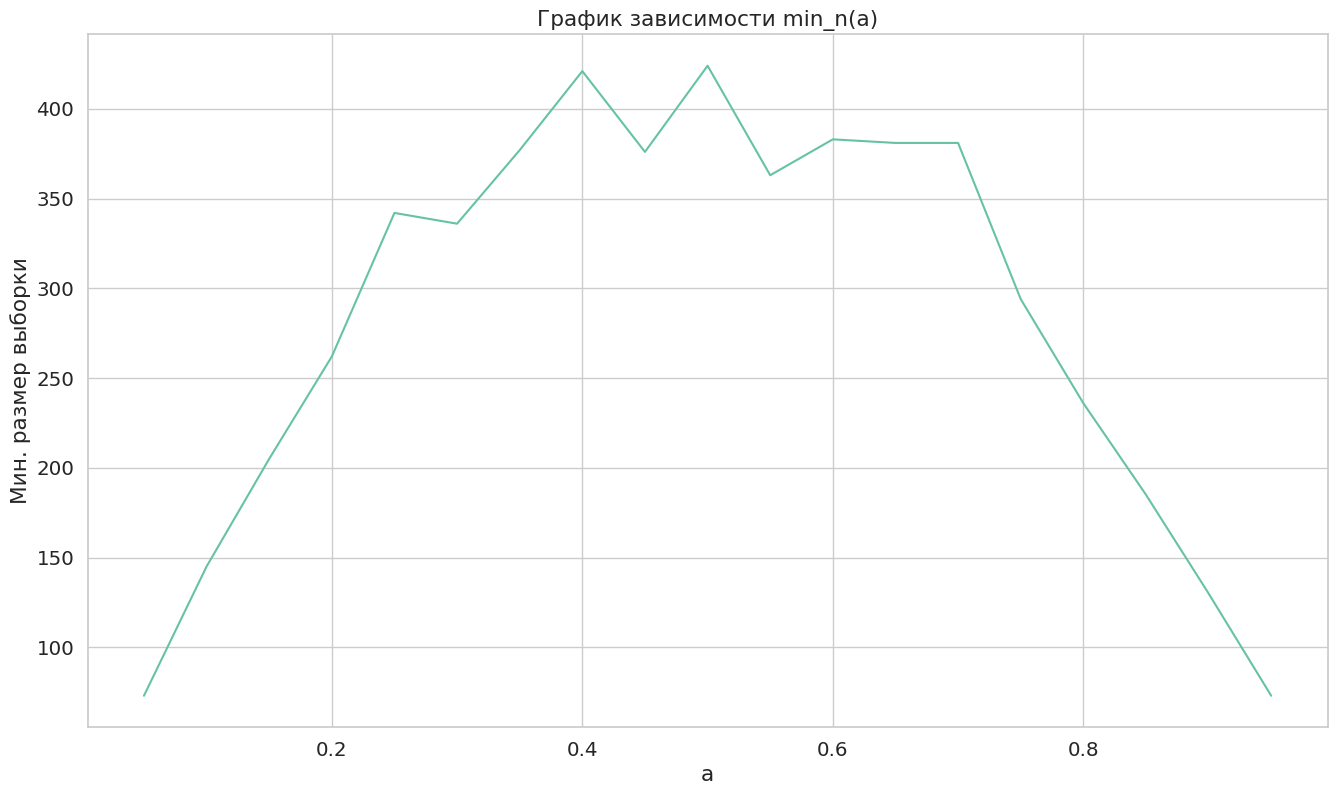

In [16]:
K = 500
tolerance = 0.02
max_n = 10000
a_values = np.arange(0.05, 1, 0.05)
n_values = []

for a in a_values:
    samples = np.random.binomial(1, a, (max_n, K))
    cum_sums = np.cumsum(samples, axis=0)
    n_range = np.arange(1, max_n + 1).reshape(-1, 1)
    sample_means = cum_sums / n_range
    F_values = np.mean(np.abs(sample_means - a), axis=1)

    n = np.where(F_values <= tolerance)[0][0] + 1
    n_values.append(n)

plt.figure(figsize=(16, 9))
plt.plot(a_values, n_values)
plt.xlabel('a')
plt.ylabel('Мин. размер выборки')
plt.title('График зависимости min_n(a)')
plt.grid(True)
plt.show()

**Выводы:**

1) Для значений параметра a, близких к 0.5, нужна выборка большего размера, чем для значений a далеких от среднего, чтобы распознать меньшее по абсолютному значению различие нужна выборка большего размера
2) Результаты говорят о значимости выбора оптимального размера выборки в исследованиях
3) При увеличении n, значение функции монотонно уменьшается.
Минимальное n, что f(n) <= 0.02 при a=0.5 у меня получалось в пределах [385-410]. График зависимости минимального n от параметра a выглядит как парабола, при a=0.5 у нас получилось одно из самых больших min_n.